In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Zoo.csv to Zoo.csv


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Zoo.csv")

# Display the first few rows
df.head()


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


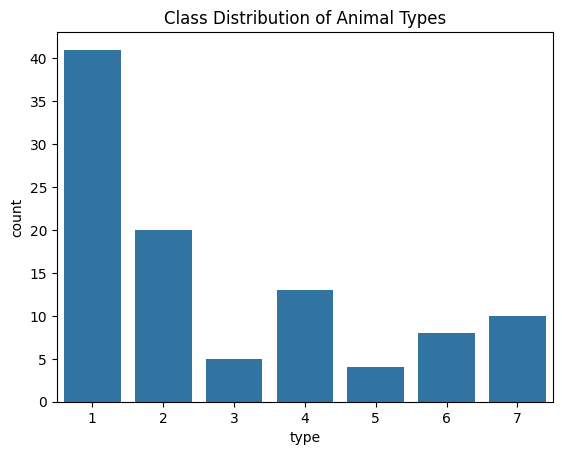

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check class distribution
# Check if 'animal_type' is the correct column name.
# It might be 'animal type' or something similar, inspect df.columns
sns.countplot(x="type", data=df)  # Replace "animal_type" with the actual column name from your DataFrame
plt.title("Class Distribution of Animal Types")
plt.show()

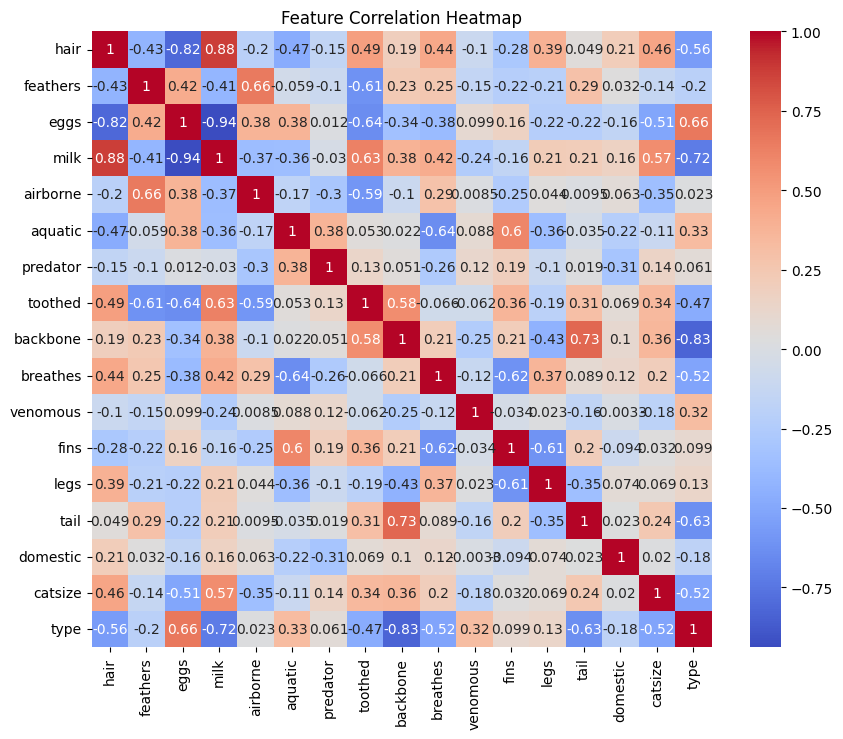

In [ ]:
plt.figure(figsize=(10, 8))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values (if necessary)
# Select only numerical columns for filling missing values
numerical_df = df.select_dtypes(include=['number'])
numerical_df.fillna(numerical_df.mean(), inplace=True)

# Update the original DataFrame with the filled numerical columns
df[numerical_df.columns] = numerical_df

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [ ]:
# Replace 'animal_type' with the actual name of the column in your DataFrame
X = df.drop(columns=["type"])  # Assuming "type" is the target

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Assuming "type" is the target
X = df.drop(columns=["type", "animal name"])  # Drop 'animal name' column
y = df["type"]

# Split the data
# Call the correct function 'train_test_split' with the necessary arguments
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Assuming "type" is the target
X = df.drop(columns=["type", "animal name"])  # Drop 'animal name' column
y = df["type"]

# Split the data
# Call the correct function 'train_test_split' with the necessary arguments
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train the KNeighborsClassifier
knn = KNeighborsClassifier()  # Create the classifier
knn.fit(X_train, y_train)  # Fit the model to the training data

KNeighborsClassifier()

<ipython-input-49-76221c4d0d8e>:26: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolors="k", marker="x")


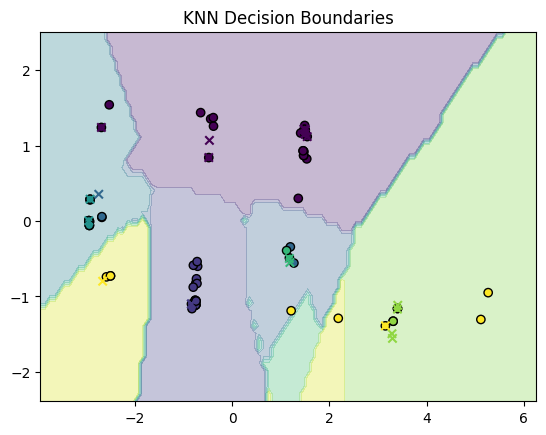

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Reduce features to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a new KNN classifier with reduced dimensions
knn_pca = KNeighborsClassifier(n_neighbors=k)
knn_pca.fit(X_train_pca, y_train)

# Generate a meshgrid for decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict for each point in the grid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors="k", marker="o")
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolors="k", marker="x")
plt.title("KNN Decision Boundaries")
plt.show()


1.What are the key hyperparameters in KNN?

The key hyperparameters in **K-Nearest Neighbors (KNN)** are:  

1. **K (Number of Neighbors)** – Determines how many neighbors are considered for classification or regression.  
2. **Distance Metric** – Defines how distance is measured (e.g., Euclidean, Manhattan, Minkowski).  
3. **Weighting Scheme** – Whether neighbors are weighted equally (`uniform`) or based on distance (`distance`).  
4. **Algorithm** – Determines how neighbors are searched (e.g., `brute`, `kd_tree`, `ball_tree`).  
5. **Leaf Size** – Affects the efficiency of tree-based searches (`kd_tree` or `ball_tree`).  


2. What distance metrics can be used in KNN?

KNN can use different **distance metrics** to measure similarity between points:  

1. **Euclidean Distance** – Most common; straight-line distance.  
2. **Manhattan Distance** – Sum of absolute differences; good for grid-based data.  
3. **Minkowski Distance** – Generalized form of Euclidean and Manhattan (with a parameter *p*).  
4. **Chebyshev Distance** – Max absolute difference in any dimension.  
5. **Hamming Distance** – Used for categorical data (counts differing elements).  
6. **Mahalanobis Distance** – Considers correlations between variables.  


